.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

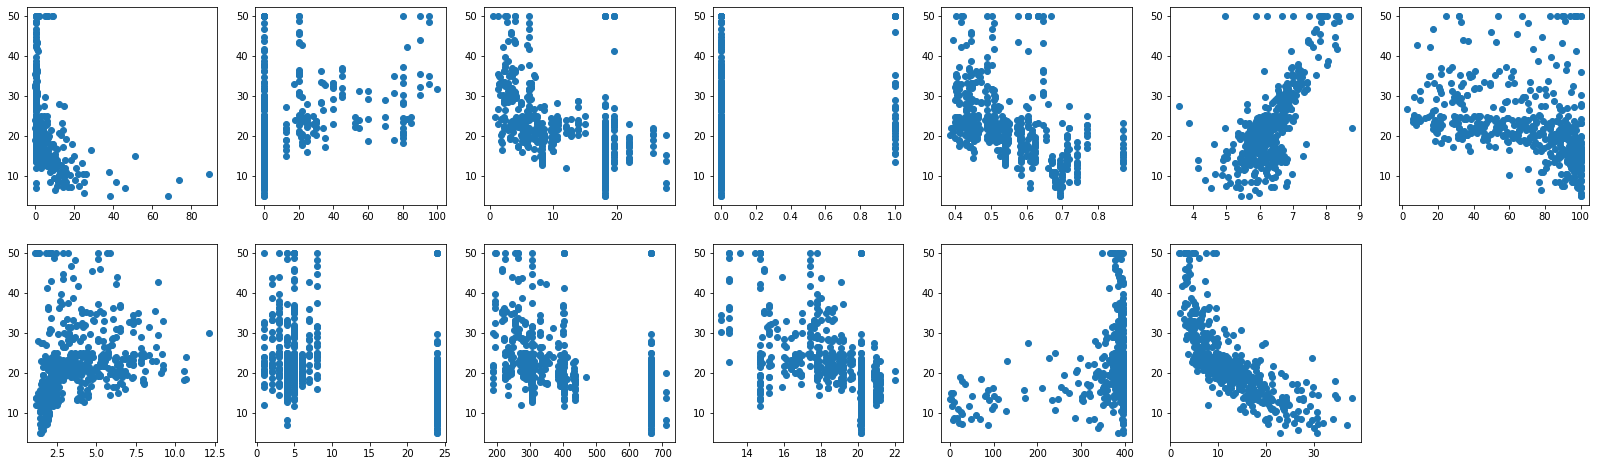

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

X = boston.data
y = boston.target
m = X[0].shape[0]

fig,ax = plt.subplots(2, 7, figsize=(28,8))
for i in range(m):
    ax[int(i/7), i%7].scatter(X[:,i], y)
plt.delaxes()
plt.show()

## linear regression

predict model:

$$f_{w,b}(x^{(i)})=wx^{(i)}+b$$

cost function:

$$J(\mathbf{w},b)=\frac{1}{2m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})^2$$


In [3]:
def cost_function(x, y, w, b):
    """
    Compute cost
    
    Args:
        x(ndarray): Shape(m,n), Boston house attributes
        y(ndarray): Shape(m,), Median value of owner-occupied homes in $1000's
        w(ndarray): Coefficient, Parameters of model
        b(float): Intercept, Parameters of model
    """
    m = x.shape[0]
    total_loss = 0
    
    for i in range(m):
        total_loss += (np.dot(w,x[i]) + b - y[i])**2
    total_loss /= (2*m)
    
    return total_loss

## Gradient

To get alculate the gradient

$$
\begin{align}
\frac{\partial{J(w,b)}}{\partial{w}}
&=\frac{\partial}{\partial{w}}(\frac{1}{2m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})^2)\\
&=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})^2\frac{\partial}{\partial{w}}f_{w,b}(x^{(i)})-y^{(i)})\\
&=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}
\end{align}
$$

We can easily get
$$\frac{\partial{J(w,b)}}{\partial{b}}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})$$

In [4]:
def compute_gradient(x, y, w, b):
    """
    Compute descent
    
    Args:
        x(ndarray): Shape(m,n), Boston house attributes
        y(ndarray): Shape(m,), Median value of owner-occupied homes in $1000's
        w(ndarray): Coefficient, Parameters of model
        b(float): Intercept, Parameters of model
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (np.dot(w, x[i]) + b - y[i])*x[i]
        dj_db += np.dot(w, x[i]) + b - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

## Gradient descent

$$w=w-\alpha\frac{\partial{J(w,b)}}{\partial{w}}\\
b=b-\alpha\frac{\partial{J(w,b)}}{\partial{w}}$$

In [8]:
def gradient_descent(x, y, w, b, alpha, compute_gradient, cost_function, iter_num):
    """
    gradient descent
    
    Args:
        x(ndarray): Shape(m,n), Boston house attributes
        y(ndarray): Shape(m,), Median value of owner-occupied homes in $1000's
        w(ndarray): Coefficient, Parameters of model
        b(float): Intercept, Parameters of model
        alpha(float): learning rate
        compute_gradient: function, compute gradient
        cost_function: function, compute cost
        iter_num(int):
    """
    J_history = []
    
    for i in range(iter_num):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        cost = cost_function(x,y,w,b)
        J_history.append(cost)
        
        #print cost 10 times
        if i%1000 == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            
        if len(J_history) > 2 and np.abs(J_history[-1]-J_history[-2]) < 1e-6:
            break
        
    return w, b

In [9]:
def z_score(x):
    n = x[0].shape[0]
    for i in range(n):
        mean = np.mean(x[:,i])
        std = np.std(x[:,i])
        x[:,i] = (x[:,i]-mean)/std
    return x

In [16]:
#w = [ 6.33179877,0.02558925,  0.40158808,  0.15251002,  0.80745634,  0.32493059, -0.14304478,  0.9088507,   0.26772928, -0.10896542,  0.60011928,  0.10759831, 0.00794747]
#b = 0.95992022
w = np.random.rand(13)
b = np.random.rand()

x_train = z_score(X)

w, b = gradient_descent(x_train,y,w,b,1e-2,compute_gradient,cost_function,1000000)

print(f"w:{w}\nb:{b}")

Iteration    0: Cost   280.88
Iteration 1000: Cost    11.09
Iteration 2000: Cost    10.98
Iteration 3000: Cost    10.96
Iteration 4000: Cost    10.95
w:[-0.92082098  1.06872279  0.10135455  0.68738565 -2.04914909  2.68154261
  0.0132706  -3.10645268  2.56244752 -1.96364494 -2.05676786  0.84860399
 -3.7397579 ]
b:22.532806324110496


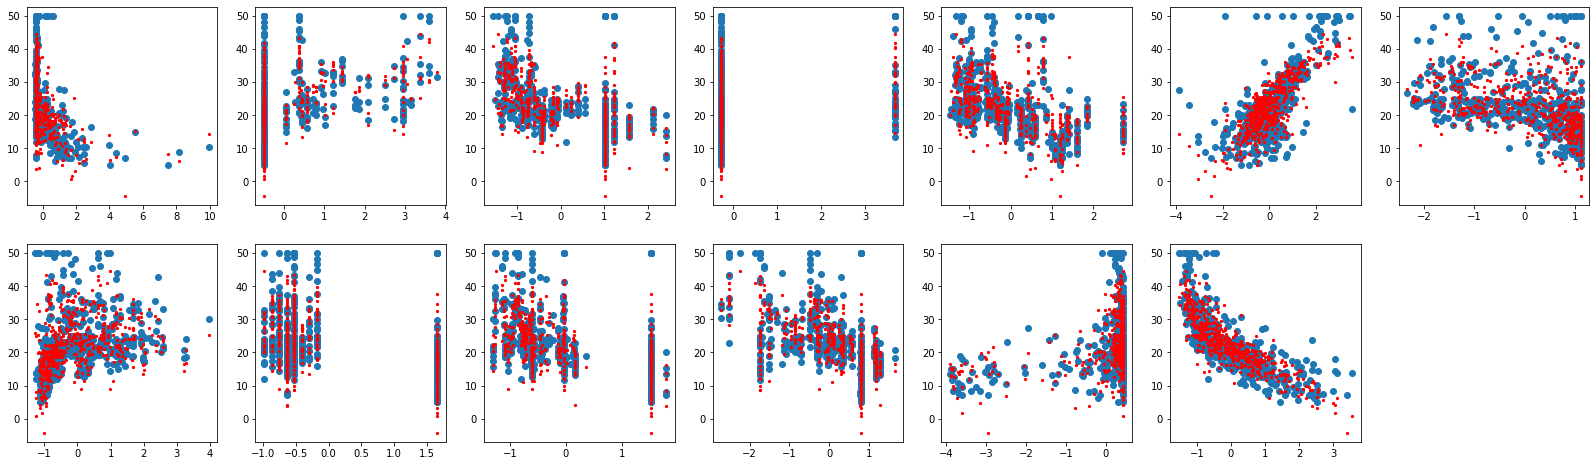

In [17]:
f_wb = np.dot(x_train,w) + b

fig,ax = plt.subplots(2, 7, figsize=(28,8))
for i in range(m):
    ax[int(i/7), i%7].scatter(x_train[:,i], y)
    ax[int(i/7), i%7].scatter(x_train[:,i], f_wb, c='red', s= 5)
plt.delaxes()
plt.show()